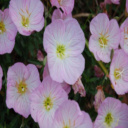

In [52]:
import torchvision
import torch
from PIL import Image

# Create a vector of zeros of size 5
size = (128, 128)
transform = torchvision.transforms.Compose([
    torchvision.transforms.Resize(size),
    torchvision.transforms.ToTensor()
])
train_dataset = list(torchvision.datasets.Flowers102(
    root="./flowers",
    split="train",
    transform=transform,
    download=True
))
test_dataset = list(torchvision.datasets.Flowers102(
    root="./flowers",
    split="test",
    transform=transform,
    download=True
))

def visualize_image(img: torch.Tensor) -> Image.Image:
    return Image.fromarray((img.permute(1, 2, 0) * 255).to(torch.uint8).numpy())

visualize_image(train_dataset[0][0])

In [26]:
train_dataset[0]

(tensor([[[0.0471, 0.0706, 0.0745,  ..., 0.1255, 0.4667, 0.5608],
          [0.0667, 0.0706, 0.0549,  ..., 0.1294, 0.4824, 0.5647],
          [0.0824, 0.0745, 0.0549,  ..., 0.1451, 0.5059, 0.5686],
          ...,
          [0.1059, 0.1059, 0.0863,  ..., 0.5020, 0.4902, 0.4706],
          [0.1137, 0.1137, 0.1294,  ..., 0.5059, 0.4784, 0.4706],
          [0.1020, 0.1176, 0.1176,  ..., 0.5020, 0.4745, 0.4667]],
 
         [[0.0863, 0.1255, 0.1373,  ..., 0.1333, 0.3412, 0.3961],
          [0.0941, 0.1098, 0.1059,  ..., 0.1333, 0.3490, 0.3922],
          [0.0902, 0.0941, 0.0863,  ..., 0.1333, 0.3608, 0.3843],
          ...,
          [0.1961, 0.1804, 0.1333,  ..., 0.4235, 0.4118, 0.3922],
          [0.2118, 0.2039, 0.2000,  ..., 0.4275, 0.4039, 0.3922],
          [0.2078, 0.2196, 0.2196,  ..., 0.4196, 0.4078, 0.3765]],
 
         [[0.0314, 0.0353, 0.0353,  ..., 0.0824, 0.4745, 0.6000],
          [0.0392, 0.0353, 0.0196,  ..., 0.0941, 0.4902, 0.5922],
          [0.0431, 0.0353, 0.0235,  ...,

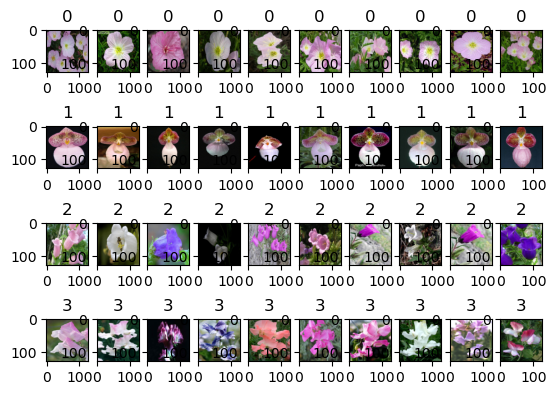

In [25]:
import matplotlib.pyplot as plt

f, ax = plt.subplots(4, 10)
for i, (im, l) in enumerate(list(train_dataset)[:40]):
    ax[i // 10, i % 10].imshow(visualize_image(im))
    ax[i // 10, i % 10].set_title(l)

class_01 = list(train_dataset)[:20]

## Nearest Neighbor Classifier

In [37]:
(test_dataset[0][0] - class_01[0][0]).pow(2).sum().sqrt()
# class_01[0]

tensor(83.4571)

In [68]:
def nn_classifier(x):
    dist = [((x - im).pow(2).sum(), l) for im, l in class_01]
    return min(dist)[1]

# nn_classifier(test_dataset[0][0])
accuracy = sum(nn_classifier(x) == l for x, l in list(test_dataset)[:20]) / 20
print(accuracy)

0.4


## K Nearest Neighbor Classifier

In [67]:
def knn_classifier(x, k=3):
    dist = [((x - im).pow(2).sum(), l) for im, l in class_01]
    k_closest = [l for _, l in sorted(dist)[:k]]
    return sorted(k_closest)[k//2]

# knn_classifier(test_dataset[0][0])
accuracy = sum(knn_classifier(x) == l for x, l in list(test_dataset)[:20]) / 20
print(accuracy)

0.5


## K Nearest Neighbor Regression

In [66]:
def knn_regression(x, k=3):
    dist = [((x - im).pow(2).sum(), l) for im, l in class_01]
    k_closest = [l for _, l in sorted(dist)[:k]]
    return torch.mean(torch.tensor(k_closest).float())

knn_regression(test_dataset[0][0])

tensor(0.6667)